In [23]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt


# 1

In [3]:
# read txt data
def read_data(filepath):
    data = pd.read_table(filepath, sep=' ', header=None)
    data.columns = ["x1", "x2", "y"]
    return data

filepath = 'D2.txt'
data = read_data(filepath)
data

,x1,x2,y
0,0.315561,0.956006,1
1,0.344972,0.693422,1
2,0.398419,0.974354,1
3,0.347109,0.566740,0
4,0.985903,0.564388,1
...,...,...,...
995,0.418671,0.044160,0
996,0.794456,0.142425,0
997,0.384576,0.609262,0
998,0.843186,0.848278,1


In [4]:
def get_entropy(df):
    if len(df) == 0:
        return 0
    # get the number of each class
    num = df['y'].value_counts()
    # get the probability of each class
    p = num / num.sum()
    # calculate entropy
    entropy = (-p * np.log2(p)).sum()
    return entropy

def get_gain_ratio(df, col, split_value):
    if len(df) == 0:
        return 0
    # get the entropy of df
    entropy_all = get_entropy(df)
    # split df into two parts
    df_l = df[df[col] >= split_value]
    df_r = df[df[col] < split_value]
    # check if the split is valid
    if len(df_l) == 0 or len(df_r) == 0:
        return 0
    # get the entropy of df_l and df_r
    entropy_l = get_entropy(df_l)
    entropy_r = get_entropy(df_r)
    # calculate information gain
    info_gain = entropy_all - (len(df_l)/len(df))*entropy_l - (len(df_r)/len(df))*entropy_r
    # calculate split info
    split_info = -((len(df_l)/len(df))*np.log2(len(df_l)/len(df)) + (len(df_r)/len(df))*np.log2(len(df_r)/len(df)))
    # check if the split info (entropy) is zero
    if split_info == 0:
        print("info_gain: ", info_gain)
        return 0
    # calculate gain ratio
    gain_ratio = info_gain / split_info
    return gain_ratio

# find the best split point given a feature
def get_best_split(df, col):
    values = df[col].unique()
    gain_ratios = [get_gain_ratio(df, col, value) for value in values]
    best_split = values[np.argmax(gain_ratios)]
    return best_split, np.max(gain_ratios)

# find the best feature to split
def get_best_feature(df):
    gain_ratios = [get_best_split(df, col) for col in df.columns[:-1]]
    best_feature = df.columns[:-1][np.argmax([info_gain[1] for info_gain in gain_ratios])]
    best_split = gain_ratios[np.argmax([info_gain[1] for info_gain in gain_ratios])][0]
    best_gain_ratio = np.max([gain_ratio[1] for gain_ratio in gain_ratios])
    return best_feature, best_split, best_gain_ratio

# get the most frequent label
def get_most_frequent_label(df):
    label0 = (df['y'] == 0).sum()
    label1 = (df['y'] == 1).sum()
    if label0 == label1:
        return 1
    else:
        return np.argmax([label0, label1])
    

# create decision tree
def get_tree(df):
    # check if the node is empty
    if len(df) == 0:
        return -1
    
    best_feature, best_split, best_gain_ratio = get_best_feature(df)
    print(best_feature, best_split, best_gain_ratio)
    
    # split the df into two parts
    df_l = df[df[best_feature] >= best_split]
    df_r = df[df[best_feature] < best_split]
    
    # check if the entropy of any candidates split is zero / if all splits have zero gain ratio
    if (best_gain_ratio == 0):
        # make this as a leaf node
        label = get_most_frequent_label(df)
        return label
        
    # if not, split the df into two parts and build subtrees
    else:
        tree = {}
        tree.update({(best_feature, best_split, True): get_tree(df_l)})
        tree.update({(best_feature, best_split, False): get_tree(df_r)})
        return tree

# test
tree = get_tree(data)
tree
    

x1 0.533076 0.2238061143668733
x2 0.228007 0.40277675382774347
x2 0.424906 0.1751133281825154
x1 0.985903 0.0
x1 0.708127 0.5206601917193016
x1 0.718145 0.0
x2 0.32625 0.34644489742573253
x1 0.595471 0.5023576805798505
x1 0.646007 0.3191750665186214
x1 0.67447 0.0
x2 0.403494 1.0
x1 0.595471 0.0
x1 0.620399 0.0
x1 0.541762 0.0
x1 0.678179 0.0
x1 0.887224 0.5381401523569375
x2 0.037708 0.6832381679130689
x2 0.082895 0.1916139235269724
x1 0.921975 0.0
x1 0.960783 1.0
x1 0.960783 0.0
x1 0.927522 0.0
x1 0.983256 0.0
x1 0.850316 0.2519373889044624
x2 0.169053 1.0
x1 0.850316 0.0
x1 0.87433 0.0
x1 0.641366 0.0
x2 0.88635 0.4582140527187491
x1 0.041245 0.6245466344128493
x1 0.104043 0.2533887517364727
x1 0.315561 0.0
x1 0.07642 1.0
x1 0.083797 0.0
x1 0.041245 0.0
x1 0.023132 0
x2 0.691474 0.2535183669884649
x1 0.254049 0.6816281572589445
x1 0.344972 0.0
x1 0.191915 0.2651556121840157
x2 0.792752 1.0
x1 0.207325 0.0
x1 0.253723 0.0
x2 0.864128 0.09659384816889331
x1 0.144781 1.0
x1 0.144781 0


{('x1',
  0.533076,
  True): {('x2', 0.228007, True): {('x2', 0.424906, True): 1,
   ('x2', 0.424906, False): {('x1', 0.708127, True): 1,
    ('x1',
     0.708127,
     False): {('x2',
      0.32625,
      True): {('x1', 0.595471, True): {('x1', 0.646007, True): 1,
       ('x1', 0.646007, False): {('x2', 0.403494, True): 1,
        ('x2', 0.403494, False): 0}}, ('x1', 0.595471, False): 0}, ('x2',
      0.32625,
      False): 0}}}, ('x2',
   0.228007,
   False): {('x1',
    0.887224,
    True): {('x2', 0.037708, True): {('x2', 0.082895, True): 1,
     ('x2', 0.082895, False): {('x1', 0.960783, True): 1,
      ('x1', 0.960783, False): 0}}, ('x2', 0.037708, False): 0}, ('x1',
    0.887224,
    False): {('x1', 0.850316, True): {('x2', 0.169053, True): 1,
     ('x2', 0.169053, False): 0},
    ('x1', 0.850316, False): 0}}},
 ('x1',
  0.533076,
  False): {('x2',
   0.88635,
   True): {('x1', 0.041245, True): {('x1', 0.104043, True): 1,
    ('x1', 0.104043, False): {('x1', 0.07642, True): 0,
 

In [5]:
# predict new data point
def predict(tree, x):
    if tree == -1:
        return -1
    if tree == 0:
        return 0
    if tree == 1:
        return 1
    for key in tree.keys():
        if key[2] == True:
            if x[key[0]] >= key[1]:
                return predict(tree[key], x)
        else:
            if x[key[0]] < key[1]:
                return predict(tree[key], x)
            
# test
x = {'x1': 0.9, 'x2': 0.9}
predict(tree, x)

1

## 2.1

Because the entropy of this node is 0 and there is no need to classify it further. Splitting it further will only get candidate splits with 0 entropy.

## 2.2

The dataset is:
0 0 0
0 1 1
1 0 1
1 1 0

It will refuse to split and return 1 as the label. If we split using a greedy algorithm, the biggest information gain ratio would be for either x1 or x2. However, the subsequent step cannot be correctly classified by the other feature in both groups divided by either feature. The outcome is still mixed. However, we can split it into a deeper tree by combining the two features (XOR) which will lead to no training error.

In [6]:
x = [0, 0 ,1 , 1]
y = [0, 1, 0, 1]
label = [0, 1, 1, 0]
fig = px.scatter(x=x, y=y, color=[str(i) for i in label])
fig.update_layout(
    xaxis_title="x1",
    yaxis_title="x2",
    width=500,
    height=460,
    legend_title="label",
)
fig.update_yaxes(scaleanchor = "x", scaleratio = 1)
fig.show()

## 2.3

Nodes are shown as (feature, split, gain ratio). True means ≥ the split.
{('x2', 8, gain ratio=0.430):
True -- 1,
False: {('x2', 6, gain ratio=0.121):
        True -- {('x2', 7, gain ratio=1):
                True -- 0,
                False -- 1},
        False -- {('x2', 0, gain ratio=0.362):
                True -- 0,
                False: {('x1', 0.1, gain ratio=1):
                        True -- 0,
                        False --1}
                }
        }
}

## 2.4

Nodes are shown as (feature, split).

{('x1', 10):
True -- 1,
False -- {('x2', 3):
        True -- 1,
        False -- 0
        }
}

IF x1 ≥ 10 THEN output is 1.
IF x1 < 10 AND x2 ≥ 3 THEN output is 1.
IF x1 < 10 AND x2 < 3 THEN output is 0.

## 2.5

Nodes are shown as (feature, split, logic). True means ≥ the split.
{('x2', 0.201829, True): 1,
('x2', 0.201829, False): 0
}

IF x2 ≥ 0.201829 THEN output is 1.
IF x2 < 0.201829 THEN output is 0.


{
    ("x1", 0.533076, True): {
        ("x2", 0.228007, True): {
            ("x2", 0.424906, True): 1,
            ("x2", 0.424906, False): {
                ("x1", 0.708127, True): 1,
                ("x1", 0.708127, False): {
                    ("x2", 0.32625, True): {
                        ("x1", 0.595471, True): {
                            ("x1", 0.646007, True): 1,
                            ("x1", 0.646007, False): {
                                ("x2", 0.403494, True): 1,
                                ("x2", 0.403494, False): 0,
                            },
                        },
                        ("x1", 0.595471, False): 0,
                    },
                    ("x2", 0.32625, False): 0,
                },
            },
        },
        ("x2", 0.228007, False): {
            ("x1", 0.887224, True): {
                ("x2", 0.037708, True): {
                    ("x2", 0.082895, True): 1,
                    ("x2", 0.082895, False): {
                        ("x1", 0.960783, True): 1,
                        ("x1", 0.960783, False): 0,
                    },
                },
                ("x2", 0.037708, False): 0,
            },
            ("x1", 0.887224, False): {
                ("x1", 0.850316, True): {
                    ("x2", 0.169053, True): 1,
                    ("x2", 0.169053, False): 0,
                },
                ("x1", 0.850316, False): 0,
            },
        },
    },
    ("x1", 0.533076, False): {
        ("x2", 0.88635, True): {
            ("x1", 0.041245, True): {
                ("x1", 0.104043, True): 1,
                ("x1", 0.104043, False): {
                    ("x1", 0.07642, True): 0,
                    ("x1", 0.07642, False): 1,
                },
            },
            ("x1", 0.041245, False): 0,
        },
        ("x2", 0.88635, False): {
            ("x2", 0.691474, True): {
                ("x1", 0.254049, True): 1,
                ("x1", 0.254049, False): {
                    ("x1", 0.191915, True): {
                        ("x2", 0.792752, True): 1,
                        ("x2", 0.792752, False): 0,
                    },
                    ("x1", 0.191915, False): {
                        ("x2", 0.864128, True): {
                            ("x1", 0.144781, True): 1,
                            ("x1", 0.144781, False): 0,
                        },
                        ("x2", 0.864128, False): 0,
                    },
                },
            },
            ("x2", 0.691474, False): {
                ("x2", 0.534979, True): {
                    ("x1", 0.426073, True): 1,
                    ("x1", 0.426073, False): {
                        ("x1", 0.409972, True): {
                            ("x1", 0.417579, True): 0,
                            ("x1", 0.417579, False): 1,
                        },
                        ("x1", 0.409972, False): {
                            ("x1", 0.393227, True): {
                                ("x1", 0.39583, True): 0,
                                ("x1", 0.39583, False): 1,
                            },
                            ("x1", 0.393227, False): 0,
                        },
                    },
                },
                ("x2", 0.534979, False): 0,
            },
        },
    },
}

It is very hard, so as a try, I will only interpret part of it.
1. If 'x1' is greater than 0.533076, continue to 2; else, go to 7.
2. If 'x2' is greater than 0.228007, continue to 3; else, go to 5.
3. If 'x2' is greater than 0.424906, then the outcome is 1.
4. If 'x2' is less or equal to 0.424906, and 'x1' is greater than 0.708127, then the outcome is 1.
5. If 'x1' is greater than 0.887224, continue to 6; else, the outcome is 0.
6. If 'x2' is greater than 0.037708, then the outcome is 1; else, the outcome is 0.
7. If 'x2' is greater than 0.88635, continue to 8; else, the outcome is 0.
8. If 'x1' is greater than 0.041245, then the outcome is 1; else, the outcome is 0.

## 2.6

In [7]:
filepath = 'D1.txt'
data = read_data(filepath)
data['label'] = data['y'].astype(str)

fig = px.scatter(data, x='x1', y='x2', color='label')
fig.update_layout(
    width=500,
    height=460,
    legend_title="label",
)

fig.update_yaxes(scaleanchor = "x", scaleratio = 1)
fig.show()

In [8]:
filepath = 'D2.txt'
data = read_data(filepath)
data['label'] = data['y'].astype(str)

fig = px.scatter(data, x='x1', y='x2', color='label')
fig.update_layout(
    width=500,
    height=460,
    legend_title="label",
)

fig.update_yaxes(scaleanchor = "x", scaleratio = 1)
fig.show()

x2 0.201829 1.0
x1 0.409499 0.0
x1 0.264185 0.0


C:\Users\Zheng\AppData\Local\Temp\ipykernel_15664\2709722295.py:25: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



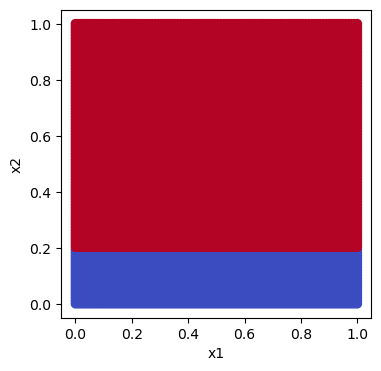

In [22]:
# decision region
filepath = 'D1.txt'
data = read_data(filepath)

tree = get_tree(data)

# create fake dataset
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)
X1, X2 = np.meshgrid(x1, x2)
# one dimension
X1 = X1.reshape(-1)
X2 = X2.reshape(-1)

df_fake = pd.DataFrame({'x1': X1, 'x2': X2})
df_fake['y'] = df_fake.apply(lambda x: predict(tree, x), axis=1)

# use mapplotlib

fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(df_fake['x1'], df_fake['x2'], c=df_fake['y'], cmap='coolwarm')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
fig.show()

C:\Users\Zheng\AppData\Local\Temp\ipykernel_15664\4195874023.py:24: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



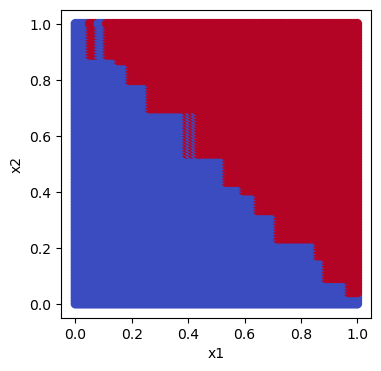

In [25]:
# decision region
filepath = 'D2.txt'
data = read_data(filepath)

tree = get_tree(data)

# create fake dataset
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)
X1, X2 = np.meshgrid(x1, x2)
# one dimension
X1 = X1.reshape(-1)
X2 = X2.reshape(-1)

df_fake = pd.DataFrame({'x1': X1, 'x2': X2})
df_fake['y'] = df_fake.apply(lambda x: predict(tree, x), axis=1)

# use mapplotlib

fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(df_fake['x1'], df_fake['x2'], c=df_fake['y'], cmap='coolwarm')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
fig.show()

## 2.7

size:  32
x1 0.761867 0.1986207444624743
x1 0.761867 0.0
x1 -0.322932 0.3673212692697695
x2 -0.90201 0.6468214774323336
x1 0.586925 0.3726071827572396
x1 0.713313 1.0
x1 0.713313 0
x1 0.586925 0
x1 0.427363 0.0
x1 -0.13738 0.0
x1 -0.955301 0.11533532084453821
x1 -0.889441 1.0
x1 -0.391307 0.0
x1 -0.955301 0
x1 -1.236163 0.0
number of nodes:  7
test error:  0.25842696629213485


C:\Users\Zheng\AppData\Local\Temp\ipykernel_15664\1305235246.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Zheng\AppData\Local\Temp\ipykernel_15664\1305235246.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



size:  128
x2 -0.90201 0.19147938645067986
x2 1.188793 0.2126501027517715
x1 -0.889441 0.0
x1 0.993895 0.2719416699252489
x1 1.080747 0.0
x1 -1.098436 0.39269792215698307
x2 -0.743999 0.25942596335175544
x1 -0.955301 0.22508495108352963
x1 0.727887 0.20172246192222673
x2 0.550313 1.0
x1 0.743237 0.0
x1 0.765197 0.0
x2 -0.663744 0.1831195716725106
x1 0.427363 0.0
x1 -0.314949 1.0
x1 -0.11632 0.0
x1 -0.516173 0
x1 -1.096325 0.36647633582613776
x1 -0.982691 0.2960654354758692
x1 -0.974415 0.0
x1 -1.050305 0.3836885465963443
x2 0.613942 1.0
x1 -1.050305 0.0
x1 -1.007149 0
x1 -1.096325 0
x1 -1.098436 0
x2 -0.870228 0.573556761014799
x1 0.1659 0.14397510467942048
x1 0.586925 0.0
x1 0.023169 1.0
x1 0.023169 0
x1 -0.391307 0.0
x1 -0.009263 0
x1 -1.236163 0.0
x1 0.761867 0.0
number of nodes:  17


C:\Users\Zheng\AppData\Local\Temp\ipykernel_15664\1305235246.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Zheng\AppData\Local\Temp\ipykernel_15664\1305235246.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



test error:  0.09369935170178283
size:  512
x2 -0.954911 0.21511090516887754
x2 1.188793 0.26144476487609425
x1 -0.889441 0.0
x1 -1.098436 0.30743125583021563
x1 0.993895 0.3847118287268699
x1 1.074344 0.07405988897949829
x1 1.080747 0.0
x1 1.067201 1.0
x1 1.067201 0
x1 0.994501 0.0
x2 -0.759475 0.3264101137931119
x2 -0.534672 0.17731375941857244
x1 -0.96224 0.18199450948356247
x2 1.1553 0.16257421947018472
x1 0.630494 0.3836885465963443
x1 0.825893 1.0
x1 0.825893 0
x1 0.743237 0.0
x1 -0.884501 0
x1 0.822298 0.11886855729011081
x2 -0.005778 0.7707284963609691
x2 1.134316 1.0
x1 0.954837 0
x1 0.859516 0.0
x1 0.900592 0.0
x2 -0.438512 0.2106692068062501
x1 0.427363 0.0
x1 -0.566554 0.633873909227736
x1 0.727887 1.0
x1 0.727887 0
x1 -0.566554 0.0
x1 -0.945018 0.0
x2 0.344395 0.6036607513802916
x2 1.069816 1.0
x1 -1.096325 0.0
x1 -1.050305 0.0
x1 -0.974712 0.0
x1 0.54009 0.3778387311866184
x1 0.765197 0.0
x1 -0.387317 1.0
x1 -0.11632 0.0
x1 -0.516173 0.0
x2 -0.952595 0.4869605556800914
x1

C:\Users\Zheng\AppData\Local\Temp\ipykernel_15664\1305235246.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Zheng\AppData\Local\Temp\ipykernel_15664\1305235246.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



test error:  0.05227655986509275
size:  2048
x2 -0.926187 0.22815448410864886
x1 -1.138432 0.24423166021894283
x2 1.225858 0.30338004420330045
x1 -0.889441 0.0
x1 1.130689 0.36880827938213756
x1 1.488094 0.0
x2 -0.537276 0.2234397123558485
x2 1.212659 0.2535179379157072
x2 1.225346 1.0
x1 -0.471913 0
x1 -0.115414 0.0
x1 1.005559 0.2606974576912837
x1 1.127628 0.37266940210153954
x1 1.1304 0.0
x2 0.165721 0.28501348258880904
x2 0.786355 0.7667582141228982
x1 1.034398 0.22710200883678872
x1 1.0909 0.0
x1 1.007943 1.0
x1 1.007943 0
x1 1.007235 0.0
x1 1.067201 0.0
x1 1.080747 0.0
x1 -1.07313 0.2777231598699027
x2 1.189333 0.19676614570670514
x2 1.205962 0.5032270699161941
x1 -0.428311 0.0
x2 1.200164 0.18424973081041326
x1 0.195564 0.0
x1 0.445661 0.4871971762327021
x1 0.445661 0
x1 -0.257996 0.33155970728682876
x1 -0.257996 0.0
x1 -0.370965 1.0
x1 -0.370965 0
x1 -0.853866 0
x1 0.987366 0.16533442311436622
x2 0.203168 0.4986097093688899
x2 1.006018 1.0
x1 0.999073 0.0
x1 0.990094 0.0
x1 0.

C:\Users\Zheng\AppData\Local\Temp\ipykernel_15664\1305235246.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Zheng\AppData\Local\Temp\ipykernel_15664\1305235246.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



test error:  0.032570422535211266
size:  8192
x2 -0.926187 0.23313221129476921
x2 1.232245 0.24798926352515538
x1 -0.889441 0.0
x1 1.13455 0.30278434121818143
x1 1.488094 0.0
x1 -1.138432 0.40253260716459627
x2 -0.698929 0.2407900669666883
x1 1.062135 0.18226509256659626
x2 0.165721 0.278192832678174
x2 0.786355 0.8257820400782603
x1 1.0909 0.0
x2 0.280301 0.5586612167084151
x1 1.084163 0.0
x1 1.105383 1.0
x1 1.105383 0.0
x1 1.067201 0
x1 1.080747 0.0
x1 -1.109935 0.19784884476464068
x2 1.198584 0.14635183024296539
x2 1.23018 0.27702614676517534
x1 -0.532228 0.0
x1 -0.686706 0.1411974920337029
x1 -0.291223 0.3370124949352061
x1 0.384608 0.3278374058579211
x1 0.661497 1.0
x1 0.719802 0.0
x1 0.445661 0.0
x1 -0.115414 0.0
x2 1.227066 1.0
x1 -0.670251 0
x1 -0.428311 0.0
x1 -0.893971 0.0
x2 -0.512367 0.15195351203509264
x1 -1.073444 0.17126925296384643
x1 1.003412 0.14051844774349312
x2 0.071049 0.48668408947644426
x2 0.991623 0.8135268203524889
x1 1.007235 0.0
x2 0.964307 0.400744695763597

C:\Users\Zheng\AppData\Local\Temp\ipykernel_15664\1305235246.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Zheng\AppData\Local\Temp\ipykernel_15664\1305235246.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



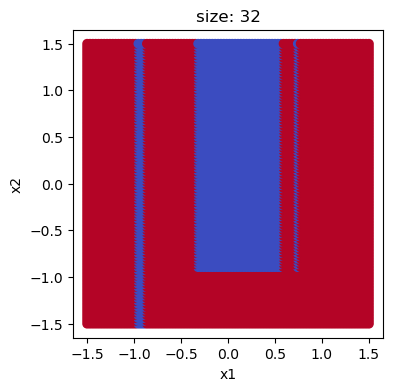

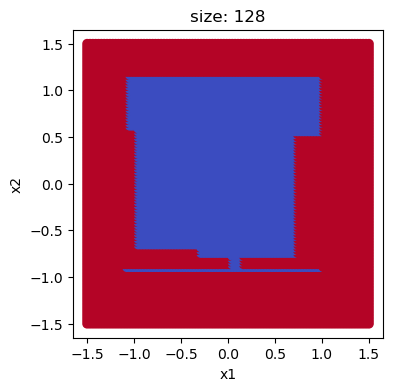

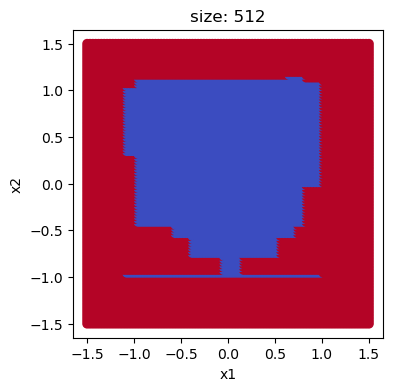

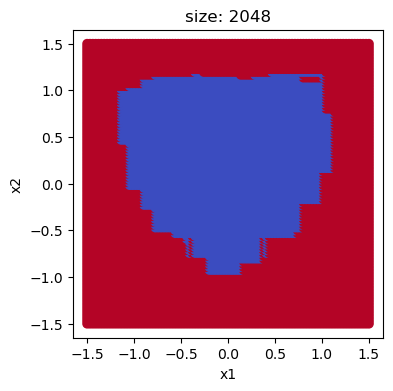

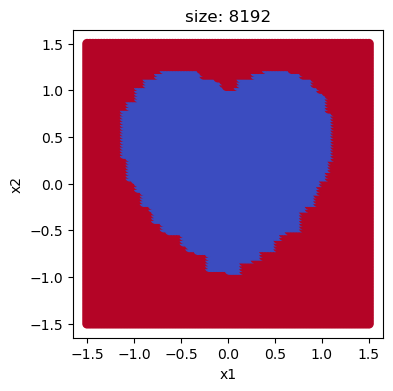

In [33]:
filepath = 'Dbig.txt'
data = read_data(filepath)
# shuffle the data
data = data.sample(frac=1, random_state=666).reset_index(drop=True)

sizes = [32, 128, 512, 2048, 8192]
nodes = []
errs = []

for size in sizes:
    print("size: ", size)
    
    # split the data into train and test
    train = data[:size]
    test = data[size:]
    
    # train
    tree = get_tree(train)
    
    # number of nodes
    node = str(tree).count('True')
    print("number of nodes: ", node)
    nodes.append(node)
    
    # Measure its test set error
    test['y_pred'] = test.apply(lambda x: predict(tree, x), axis=1)
    test['error'] = (test['y'] != test['y_pred']).astype(int)
    test_error = test['error'].sum() / len(test)
    
    print("test error: ", test_error)
    errs.append(test_error)

    # plot boundary
    # create fake dataset
    x1_min, x1_max = data['x1'].min(), data['x1'].max()
    x2_min, x2_max = data['x2'].min(), data['x2'].max()
    x1 = np.linspace(x1_min, x1_max, 100)
    x2 = np.linspace(x2_min, x2_max, 100)
    X1, X2 = np.meshgrid(x1, x2)
    # one dimension
    X1 = X1.reshape(-1)
    X2 = X2.reshape(-1)

    df_fake = pd.DataFrame({'x1': X1, 'x2': X2})
    df_fake['y'] = df_fake.apply(lambda x: predict(tree, x), axis=1)

    # use mapplotlib

    fig, ax = plt.subplots(figsize=(4, 4))
    ax.scatter(df_fake['x1'], df_fake['x2'], c=df_fake['y'], cmap='coolwarm')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title("size: " + str(size))
    fig.savefig("2_7 size_" + str(size) + ".png")
    


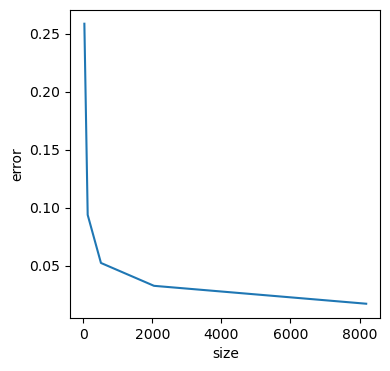

In [35]:
# plot
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(sizes, errs)
ax.set_xlabel('size')
ax.set_ylabel('error')
fig.savefig("2_7 error.png")

# 3

size:  32
number of nodes:  15
test error:  0.2404695024077047
size:  128
number of nodes:  29
test error:  0.10139789303079416
size:  512
number of nodes:  49
test error:  0.04426644182124784
size:  2048
number of nodes:  119
test error:  0.03043259557344069
size:  8192
number of nodes:  229
test error:  0.0165929203539823


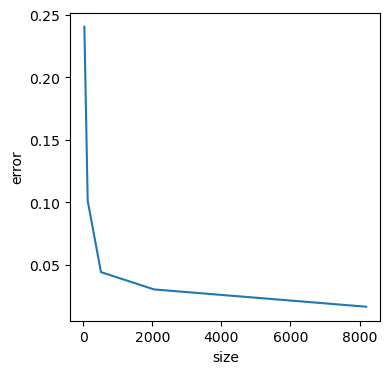

In [36]:
# use sklearn instead
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

filepath = 'Dbig.txt'
data = read_data(filepath)
# shuffle the data
data = data.sample(frac=1, random_state=666).reset_index(drop=True)

sizes = [32, 128, 512, 2048, 8192]
nodes = []
errs = []

cls = DecisionTreeClassifier()
for size in sizes:
    print("size: ", size)
    
    # split the data into train and test
    train = data[:size]
    test = data[size:]
    
    # train
    cls.fit(train[['x1', 'x2']], train['y'])
    
    # number of nodes
    node = cls.tree_.node_count
    print("number of nodes: ", node)
    nodes.append(node)
    
    # Measure its test set error
    y_pred = cls.predict(test[['x1', 'x2']])
    test_error = 1 - accuracy_score(test['y'], y_pred)
    print("test error: ", test_error)
    errs.append(test_error)
    
# plot error

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(sizes, errs)
ax.set_xlabel('size')
ax.set_ylabel('error')
fig.savefig("3 error sklearn.png")

# 4

In [42]:
from scipy.interpolate import lagrange

# fix some interval [a, b] 
a, b = 0, 1

# sample n = 100 points x from this interval uniformly
np.random.seed(666)
n = 100
x = np.random.uniform(a, b, n)

# setting function y = sin(x)
y = np.sin(x)

# Build a model f by using Lagrange interpolation
poly = lagrange(x, y)

# train error
y_pred = np.polyval(poly, x)
y_error = np.mean((y - y_pred)**2)

# generate test data
np.random.seed(999)
x_test = np.random.uniform(a, b, n)
y_test = np.sin(x_test)
y_test_pred = np.polyval(poly, x_test)
y_test_error = np.mean((y_test - y_test_pred)**2)

print("train error: ", y_error)
print("test error: ", y_test_error)

train error:  6.925258396797834e+141
test error:  9.347470975577223e+141


std:  0.0
train error:  7.33963487600969e+141
test error:  1.0106740348888275e+142
std:  0.05
train error:  2.376150744931512e+140
test error:  3.181544817136825e+140
std:  0.1
train error:  2.376150744931512e+140
test error:  3.181544817136825e+140
std:  0.15000000000000002
train error:  2.376150744931512e+140
test error:  3.181544817136825e+140
std:  0.2
train error:  2.376150744931512e+140
test error:  3.181544817136825e+140
std:  0.25
train error:  2.376150744931512e+140
test error:  3.181544817136825e+140
std:  0.30000000000000004
train error:  2.376150744931512e+140
test error:  3.181544817136825e+140
std:  0.35000000000000003
train error:  2.376150744931512e+140
test error:  3.181544817136825e+140
std:  0.4
train error:  2.376150744931512e+140
test error:  3.181544817136825e+140
std:  0.45
train error:  2.376150744931512e+140
test error:  3.181544817136825e+140
std:  0.5
train error:  2.376150744931512e+140
test error:  3.181544817136825e+140
std:  0.55
train error:  2.376150744

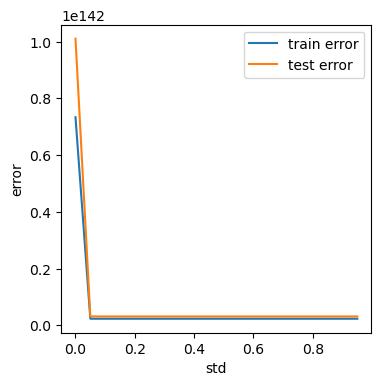

In [58]:
# create zero-mean Gaussian noise ϵ
np.random.seed(666)
n = 100
stds = np.arange(0, 1, 0.05)
train_errors = []
test_errors = []

for std in stds:
    epsilons = np.random.normal(0, 1, n)

    # fix some interval [a, b] 
    a, b = 0, 1

    # sample n = 100 points x from this interval uniformly
    np.random.seed(666)
    n = 100
    x = np.random.uniform(a, b, n)

    # setting function y = sin(x)
    y = np.sin(x)

    # add noise
    y = y + epsilons

    # Build a model f by using Lagrange interpolation
    poly = lagrange(x, y)

    # train error
    y_pred = np.polyval(poly, x)
    y_error = np.mean((y - y_pred)**2)

    # generate test data
    np.random.seed(999)
    x_test = np.random.uniform(a, b, 100)
    y_test = np.sin(x_test)
    y_test_pred = np.polyval(poly, x_test)
    y_test_error = np.mean((y_test - y_test_pred)**2)

    print("std: ", std)
    print("train error: ", y_error)
    print("test error: ", y_test_error)
    train_errors.append(y_error)
    test_errors.append(y_test_error)
    
# plot
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(stds, train_errors, label='train error')
ax.plot(stds, test_errors, label='test error')
ax.set_xlabel('std')
ax.set_ylabel('error')
ax.legend()
